# Catalyst Proxy

A small reverse proxy, load balancer and game firewall implementation.

## Description

This project pretends to improves the security and reliability of the minecraft servers providing a customizable firewall with a set of rules for:

* Detect malicious packets.
* Prevent DOS and DDOS attacks.
* Prevent non-authentic loging.

In [4]:
# See for more information: https://diagrams.mingrammer.com/
from diagrams import Diagram, Cluster, Edge
from diagrams.programming import flowchart

graph_attrs = {
    "splines": "spline",
    "concentrate": "true",
}

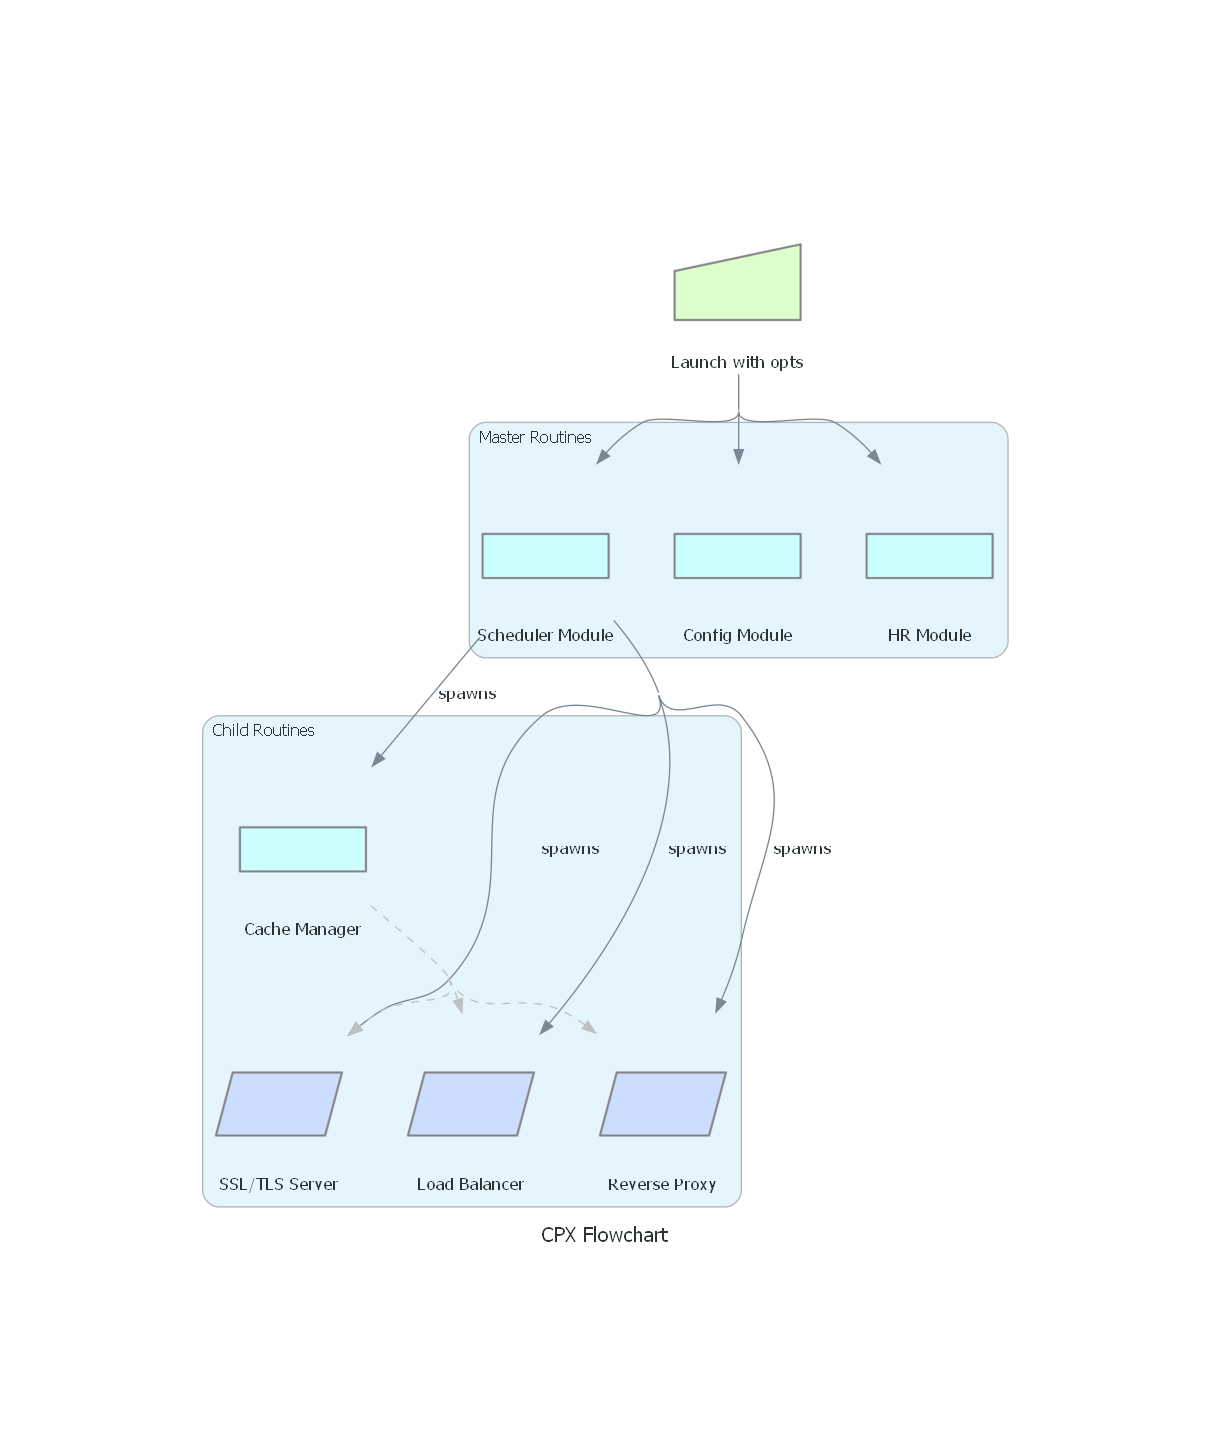

In [6]:
with Diagram("CPX Flowchart", direction="TB", outformat="svg", show=False, graph_attr=graph_attrs) as diagram:

    launcher = flowchart.ManualInput("Launch with opts")

    with Cluster("Master Routines"):
        sched_module = flowchart.Action("Scheduler Module")
        confg_module = flowchart.Action("Config Module")
        hotre_module = flowchart.Action("HR Module")

        master_process = [sched_module, confg_module, hotre_module]

    with Cluster("Child Routines"):
        cache_worker_process = flowchart.Action("Cache Manager")

        child_procesess = [
            flowchart.InputOutput("SSL/TLS Server"),
            flowchart.InputOutput("Load Balancer"),
            flowchart.InputOutput("Reverse Proxy"),
        ]

# Initial process.
launcher >> master_process

# Scheduled Procecess.
spawn_labeled_edge = Edge(label="spawns")
sched_module >> spawn_labeled_edge >> cache_worker_process
sched_module >> spawn_labeled_edge >> child_procesess

# Shared Cache
cache_worker_process >> Edge(color="gray", style="dashed") >> child_procesess

diagram